In [3]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install wordcloud

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from textblob import TextBlob
from wordcloud import WordCloud

pd.pandas.set_option('display.max_columns', None)

In [6]:
filename = "jumbo fix.csv"
df = pd.read_csv(filename, encoding='latin-1')
df.head()

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1933784683512512956,Sat Jun 14 07:12:51 +0000 2025,33,ditunggu ya po tapi aku beneran berharap film ...,1933784683512512956,NaN,NaN,in,NaN,0,2,4,https://x.com/undefined/status/193378468351251...,95858208,NaN
1,1933784104245534953,Sat Jun 14 07:10:33 +0000 2025,0,Aku bangga banget pas mereka masuk berita dan ...,1933784104245534953,NaN,NaN,in,NaN,0,0,0,https://x.com/undefined/status/193378410424553...,4665457868,NaN
2,1933471233032740904,Sat Jun 14 05:30:54 +0000 2025,0,@Adriandhy Merchandise jumbo knp ga bareng dgn...,1933759028179710001,NaN,Adriandhy,in,NaN,0,0,0,https://x.com/undefined/status/193375902817971...,558557247,NaN
3,1933745979175678238,Sat Jun 14 04:39:03 +0000 2025,0,Salah satu kegagalan Snyderverse adalah gak me...,1933745979175678238,NaN,NaN,in,NaN,0,0,0,https://x.com/undefined/status/193374597917567...,3314456581,NaN
4,1933735482917335274,Sat Jun 14 03:57:20 +0000 2025,0,Hai! Aku sedang coba bangun blog tentang film...,1933735482917335274,NaN,NaN,in,NaN,0,0,0,https://x.com/undefined/status/193373548291733...,1821407315091955712,NaN


# Preprocessing Data

In [7]:
df.shape

(1027, 15)

In [8]:
df = df.drop_duplicates(subset='full_text')

In [9]:
df.duplicated().sum()

0

In [10]:
df = df.dropna(subset='full_text')

In [11]:
df.shape

(1003, 15)

In [12]:
data_tweet = df.iloc[0:, 3:4]
data_tweet.head()

,full_text
0,ditunggu ya po tapi aku beneran berharap film ...
1,Aku bangga banget pas mereka masuk berita dan ...
2,@Adriandhy Merchandise jumbo knp ga bareng dgn...
3,Salah satu kegagalan Snyderverse adalah gak me...
4,Hai! Aku sedang coba bangun blog tentang film...


In [13]:
import re

def clean_text(text):

    text = re.sub(r"@[A-Za-z0-9_]+", '', text)
    text = re.sub(r"#\w+", '', text)
    text = re.sub(r"RT[\s]+", '', text)
    text = re.sub(r"https?://\S+", '', text)
    text = re.sub(r"[^A-Za-z0-9\s]", '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    text = text.lower()
    return text

data_tweet['cleaned_text'] = data_tweet['full_text'].apply(clean_text)


In [14]:
data_tweet

,full_text,cleaned_text
0,ditunggu ya po tapi aku beneran berharap film ...,ditunggu ya po tapi aku beneran berharap film ...
1,Aku bangga banget pas mereka masuk berita dan ...,aku bangga banget pas mereka masuk berita dan ...
2,@Adriandhy Merchandise jumbo knp ga bareng dgn...,merchandise jumbo knp ga bareng dgn film nya k...
3,Salah satu kegagalan Snyderverse adalah gak me...,salah satu kegagalan snyderverse adalah gak me...
4,Hai! Aku sedang coba bangun blog tentang film...,hai aku sedang coba bangun blog tentang film a...
...,...,...
1022,Kalo ada film animasi bagus tuh langsung keing...,kalo ada film animasi bagus tuh langsung keing...
1023,Mau review sedikit film ini. Awal nya gw pikir...,mau review sedikit film ini awal nya gw pikir ...
1024,@aegyossaI Pengen ntn jumbo krm ingin menemani...,pengen ntn jumbo krm ingin menemani anak berim...
1025,ini mah jelek film nya dan animasinya kurang k...,ini mah jelek film nya dan animasinya kurang k...


In [15]:
data_tweet = data_tweet.drop_duplicates(subset='cleaned_text')

In [16]:
data_tweet.dropna(subset='cleaned_text', inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_28420\4005283426.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tweet.dropna(subset='cleaned_text', inplace=True)


In [17]:
data_tweet.shape

(971, 2)

In [18]:
data_tweet

,full_text,cleaned_text
0,ditunggu ya po tapi aku beneran berharap film ...,ditunggu ya po tapi aku beneran berharap film ...
1,Aku bangga banget pas mereka masuk berita dan ...,aku bangga banget pas mereka masuk berita dan ...
2,@Adriandhy Merchandise jumbo knp ga bareng dgn...,merchandise jumbo knp ga bareng dgn film nya k...
3,Salah satu kegagalan Snyderverse adalah gak me...,salah satu kegagalan snyderverse adalah gak me...
4,Hai! Aku sedang coba bangun blog tentang film...,hai aku sedang coba bangun blog tentang film a...
...,...,...
1022,Kalo ada film animasi bagus tuh langsung keing...,kalo ada film animasi bagus tuh langsung keing...
1023,Mau review sedikit film ini. Awal nya gw pikir...,mau review sedikit film ini awal nya gw pikir ...
1024,@aegyossaI Pengen ntn jumbo krm ingin menemani...,pengen ntn jumbo krm ingin menemani anak berim...
1025,ini mah jelek film nya dan animasinya kurang k...,ini mah jelek film nya dan animasinya kurang k...


# Normalisasi Data

In [19]:
import re

def normalize_text(text):
    # Normalisasi kata tidak baku
    text = re.sub(r'\bpls\b', 'tolong', text)
    text = re.sub(r'\bthx\b', 'terima kasih', text)
    text = re.sub(r'\bbur\b', 'kamu', text)
    text = re.sub(r'\bbu\b', 'kamu', text)
    text = re.sub(r'\bbim\b', 'saya', text)
    text = re.sub(r'\bga\b', 'tidak', text)
    text = re.sub(r'\byg\b', 'yang', text)
    text = re.sub(r'\bdg\b', 'dengan', text)
    text = re.sub(r'\btdk\b', 'tidak', text)
    text = re.sub(r'\baja\b', 'saja', text)
    text = re.sub(r'\bgak\b', 'tidak', text)
    text = re.sub(r'\bdlm\b', 'dalam', text)
    text = re.sub(r'\bkl\b', 'kalau', text)
    text = re.sub(r'\bkbrn\b', 'karena', text)
    text = re.sub(r'\bdri\b', 'dari', text)
    text = re.sub(r'\bngg\b', 'ingin', text)
    text = re.sub(r'\bdk\b', 'tidak', text)
    text = re.sub(r'\bsbg\b', 'sebagai', text)
    text = re.sub(r'\bbmlm\b', 'belum', text)
    text = re.sub(r'\bsdh\b', 'sudah', text)
    text = re.sub(r'\baj\b', 'saja', text)
    text = re.sub(r'\bknp\b', 'kenapa', text)
    text = re.sub(r'\bnih\b', 'ini', text)
    text = re.sub(r'\bdeh\b', 'sudah', text)
    text = re.sub(r'\bbok\b', 'baik', text)
    text = re.sub(r'\bken\b', 'kenapa', text)
    text = re.sub(r'\blg\b', 'lagi', text)
    text = re.sub(r'\bsmg\b', 'semoga', text)
    text = re.sub(r'\bskrang\b', 'sekarang', text)
    text = re.sub(r'\byok\b', 'ayo', text)
    text = re.sub(r'\bbangettt\b', 'banget', text)
    text = re.sub(r'\bbgt\b', 'banget', text)



    return text

data_tweet['cleaned_text'] = data_tweet['cleaned_text'].apply(normalize_text)


C:\Users\USER\AppData\Local\Temp\ipykernel_28420\2717211246.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tweet['cleaned_text'] = data_tweet['cleaned_text'].apply(normalize_text)


In [20]:
data_tweet

,full_text,cleaned_text
0,ditunggu ya po tapi aku beneran berharap film ...,ditunggu ya po tapi aku beneran berharap film ...
1,Aku bangga banget pas mereka masuk berita dan ...,aku bangga banget pas mereka masuk berita dan ...
2,@Adriandhy Merchandise jumbo knp ga bareng dgn...,merchandise jumbo kenapa tidak bareng dgn film...
3,Salah satu kegagalan Snyderverse adalah gak me...,salah satu kegagalan snyderverse adalah tidak ...
4,Hai! Aku sedang coba bangun blog tentang film...,hai aku sedang coba bangun blog tentang film a...
...,...,...
1022,Kalo ada film animasi bagus tuh langsung keing...,kalo ada film animasi bagus tuh langsung keing...
1023,Mau review sedikit film ini. Awal nya gw pikir...,mau review sedikit film ini awal nya gw pikir ...
1024,@aegyossaI Pengen ntn jumbo krm ingin menemani...,pengen ntn jumbo krm ingin menemani anak berim...
1025,ini mah jelek film nya dan animasinya kurang k...,ini mah jelek film nya dan animasinya kurang k...


In [21]:
import nltk
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [22]:
import nltk
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize

data_tweet['tokenized_text'] = data_tweet['cleaned_text'].apply(word_tokenize)
data_tweet.head()

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
C:\Users\USER\AppData\Local\Temp\ipykernel_28420\3951346478.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tweet['tokenized_text'] = data_tweet['cleaned_text'].apply(word_tokenize)


,full_text,cleaned_text,tokenized_text
0,ditunggu ya po tapi aku beneran berharap film ...,ditunggu ya po tapi aku beneran berharap film ...,"[ditunggu, ya, po, tapi, aku, beneran, berhara..."
1,Aku bangga banget pas mereka masuk berita dan ...,aku bangga banget pas mereka masuk berita dan ...,"[aku, bangga, banget, pas, mereka, masuk, beri..."
2,@Adriandhy Merchandise jumbo knp ga bareng dgn...,merchandise jumbo kenapa tidak bareng dgn film...,"[merchandise, jumbo, kenapa, tidak, bareng, dg..."
3,Salah satu kegagalan Snyderverse adalah gak me...,salah satu kegagalan snyderverse adalah tidak ...,"[salah, satu, kegagalan, snyderverse, adalah, ..."
4,Hai! Aku sedang coba bangun blog tentang film...,hai aku sedang coba bangun blog tentang film a...,"[hai, aku, sedang, coba, bangun, blog, tentang..."


In [23]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

stopwords = set(stopwords.words('indonesian'))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

stopwords = set(stopwords.words('indonesian'))

data_tweet['stopwords'] = data_tweet['tokenized_text'].apply(lambda x: [word for word in x if word not in stopwords])
data_tweet.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\USER\AppData\Local\Temp\ipykernel_28420\3106623842.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tweet['stopwords'] = data_tweet['tokenized_text'].apply(lambda x: [word for word in x if word not in stopwords])


,full_text,cleaned_text,tokenized_text,stopwords
0,ditunggu ya po tapi aku beneran berharap film ...,ditunggu ya po tapi aku beneran berharap film ...,"[ditunggu, ya, po, tapi, aku, beneran, berhara...","[ditunggu, ya, po, beneran, berharap, film, su..."
1,Aku bangga banget pas mereka masuk berita dan ...,aku bangga banget pas mereka masuk berita dan ...,"[aku, bangga, banget, pas, mereka, masuk, beri...","[bangga, banget, pas, masuk, berita, diliput, ..."
2,@Adriandhy Merchandise jumbo knp ga bareng dgn...,merchandise jumbo kenapa tidak bareng dgn film...,"[merchandise, jumbo, kenapa, tidak, bareng, dg...","[merchandise, jumbo, bareng, dgn, film, nya, k..."
3,Salah satu kegagalan Snyderverse adalah gak me...,salah satu kegagalan snyderverse adalah tidak ...,"[salah, satu, kegagalan, snyderverse, adalah, ...","[salah, kegagalan, snyderverse, menancapkan, l..."
4,Hai! Aku sedang coba bangun blog tentang film...,hai aku sedang coba bangun blog tentang film a...,"[hai, aku, sedang, coba, bangun, blog, tentang...","[hai, coba, bangun, blog, film, butuh, bantuan..."


#Text Stemming

In [25]:
pip install Sastrawi

Note: you may need to restart the kernel to use updated packages.


In [26]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemming(df, input_col, output_col):
    df[output_col] = df[input_col].apply(lambda x: [stemmer.stem(word) for word in x])
    df[output_col] = df[output_col].apply(lambda x: ' '.join(x))
    return df


In [27]:
data_tweet = stemming(data_tweet, 'stopwords', 'stemmed_text')

C:\Users\USER\AppData\Local\Temp\ipykernel_28420\1775134224.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[output_col] = df[input_col].apply(lambda x: [stemmer.stem(word) for word in x])
C:\Users\USER\AppData\Local\Temp\ipykernel_28420\1775134224.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[output_col] = df[output_col].apply(lambda x: ' '.join(x))


In [28]:
data_tweet.to_csv('jumbo_clean2.csv', index=False)

In [29]:
df = pd.read_csv('jumbo_clean2.csv')
df.head()

,full_text,cleaned_text,tokenized_text,stopwords,stemmed_text
0,ditunggu ya po tapi aku beneran berharap film ...,ditunggu ya po tapi aku beneran berharap film ...,"['ditunggu', 'ya', 'po', 'tapi', 'aku', 'bener...","['ditunggu', 'ya', 'po', 'beneran', 'berharap'...",tunggu ya po beneran harap film sukses kemarin...
1,Aku bangga banget pas mereka masuk berita dan ...,aku bangga banget pas mereka masuk berita dan ...,"['aku', 'bangga', 'banget', 'pas', 'mereka', '...","['bangga', 'banget', 'pas', 'masuk', 'berita',...",bangga banget pas masuk berita liput tv ain ko...
2,@Adriandhy Merchandise jumbo knp ga bareng dgn...,merchandise jumbo kenapa tidak bareng dgn film...,"['merchandise', 'jumbo', 'kenapa', 'tidak', 'b...","['merchandise', 'jumbo', 'bareng', 'dgn', 'fil...",merchandise jumbo bareng dgn film nya klo skrg...
3,Salah satu kegagalan Snyderverse adalah gak me...,salah satu kegagalan snyderverse adalah tidak ...,"['salah', 'satu', 'kegagalan', 'snyderverse', ...","['salah', 'kegagalan', 'snyderverse', 'menanca...",salah gagal snyderverse tancap legacy superman...
4,Hai! Aku sedang coba bangun blog tentang film...,hai aku sedang coba bangun blog tentang film a...,"['hai', 'aku', 'sedang', 'coba', 'bangun', 'bl...","['hai', 'coba', 'bangun', 'blog', 'film', 'but...",hai coba bangun blog film butuh bantu kasih ko...


In [30]:
df.shape

(971, 5)

# Sentimen Analisis Memakai TextBlob

In [31]:
from textblob import TextBlob

data_tweet = list(df['stemmed_text'])
polaritas = 0
status = []
total_positif = total_negatif = total_netral = total = 0

for tweet in data_tweet:
    tweet = str(tweet) if tweet is not None else ""
    analysis = TextBlob(tweet)
    polaritas += analysis.sentiment.polarity

    if analysis.sentiment.polarity > 0:
        total_positif += 1
        status.append('Positif')
    elif analysis.sentiment.polarity < 0:
        total_negatif += 1
        status.append('Negatif')
    else:
        total_netral += 1
        status.append('Netral')

    total += 1

print(f'Hasil Analisis Data: ')
print(f'Positif: {total_positif}')
print(f'Negatif: {total_negatif}')
print(f'Netral: {total_netral}')
print(f'Total: {total}')



Hasil Analisis Data: 
Positif: 111
Negatif: 90
Netral: 770
Total: 971


In [32]:
df['sentiment'] = status
df

,full_text,cleaned_text,tokenized_text,stopwords,stemmed_text,sentiment
0,ditunggu ya po tapi aku beneran berharap film ...,ditunggu ya po tapi aku beneran berharap film ...,"['ditunggu', 'ya', 'po', 'tapi', 'aku', 'bener...","['ditunggu', 'ya', 'po', 'beneran', 'berharap'...",tunggu ya po beneran harap film sukses kemarin...,Netral
1,Aku bangga banget pas mereka masuk berita dan ...,aku bangga banget pas mereka masuk berita dan ...,"['aku', 'bangga', 'banget', 'pas', 'mereka', '...","['bangga', 'banget', 'pas', 'masuk', 'berita',...",bangga banget pas masuk berita liput tv ain ko...,Netral
2,@Adriandhy Merchandise jumbo knp ga bareng dgn...,merchandise jumbo kenapa tidak bareng dgn film...,"['merchandise', 'jumbo', 'kenapa', 'tidak', 'b...","['merchandise', 'jumbo', 'bareng', 'dgn', 'fil...",merchandise jumbo bareng dgn film nya klo skrg...,Netral
3,Salah satu kegagalan Snyderverse adalah gak me...,salah satu kegagalan snyderverse adalah tidak ...,"['salah', 'satu', 'kegagalan', 'snyderverse', ...","['salah', 'kegagalan', 'snyderverse', 'menanca...",salah gagal snyderverse tancap legacy superman...,Netral
4,Hai! Aku sedang coba bangun blog tentang film...,hai aku sedang coba bangun blog tentang film a...,"['hai', 'aku', 'sedang', 'coba', 'bangun', 'bl...","['hai', 'coba', 'bangun', 'blog', 'film', 'but...",hai coba bangun blog film butuh bantu kasih ko...,Netral
...,...,...,...,...,...,...
966,Kalo ada film animasi bagus tuh langsung keing...,kalo ada film animasi bagus tuh langsung keing...,"['kalo', 'ada', 'film', 'animasi', 'bagus', 't...","['kalo', 'film', 'animasi', 'bagus', 'tuh', 'l...",kalo film animasi bagus tuh langsung keinget k...,Netral
967,Mau review sedikit film ini. Awal nya gw pikir...,mau review sedikit film ini awal nya gw pikir ...,"['mau', 'review', 'sedikit', 'film', 'ini', 'a...","['review', 'film', 'nya', 'gw', 'pikir', 'anim...",review film nya gw pikir animasi tp tonton gw ...,Positif
968,@aegyossaI Pengen ntn jumbo krm ingin menemani...,pengen ntn jumbo krm ingin menemani anak berim...,"['pengen', 'ntn', 'jumbo', 'krm', 'ingin', 'me...","['pengen', 'ntn', 'jumbo', 'krm', 'menemani', ...",ken ntn jumbo krm tani anak imajinasi buka cak...,Netral
969,ini mah jelek film nya dan animasinya kurang k...,ini mah jelek film nya dan animasinya kurang k...,"['ini', 'mah', 'jelek', 'film', 'nya', 'dan', ...","['mah', 'jelek', 'film', 'nya', 'animasinya', ...",mah jelek film nya animasi tarik,Netral


In [33]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [34]:
"""
from nltk.sentiment.vader import SentimentIntensityAnalyzer

def get_sentiment_subjectivity(text):
    analyzer = SentimentIntensityAnalyzer()
    if not isinstance(text, str):
        text = ''
    score = analyzer.polarity_scores(text)
    return score["compound"]

df["Subjectivity"] = df["stemmed_text"].apply(get_sentiment_subjectivity)
df["Sentiment"] = df["Subjectivity"].apply(lambda score: 'Positif' if score > 0 else 'Negatif' if score < 0 else 'Netral')

df.head()
"""

'\nfrom nltk.sentiment.vader import SentimentIntensityAnalyzer\n\ndef get_sentiment_subjectivity(text):\n    analyzer = SentimentIntensityAnalyzer()\n    if not isinstance(text, str):\n        text = \'\'\n    score = analyzer.polarity_scores(text)\n    return score["compound"]\n\ndf["Subjectivity"] = df["stemmed_text"].apply(get_sentiment_subjectivity)\ndf["Sentiment"] = df["Subjectivity"].apply(lambda score: \'Positif\' if score > 0 else \'Negatif\' if score < 0 else \'Netral\')\n\ndf.head()\n'

In [35]:
"""
# Hitung jumlah masing-masing sentimen
jumlah_positif = (df["Sentiment"] == 'Positif').sum()
jumlah_negatif = (df["Sentiment"] == 'Negatif').sum()
jumlah_netral = (df["Sentiment"] == 'Netral').sum()
total = len(df)

# Cetak hasil
print("Hasil Analisis Sentimen:")
print(f"Positif: {jumlah_positif}")
print(f"Negatif: {jumlah_negatif}")
print(f"Netral: {jumlah_netral}")
print(f"Total: {total}")
"""

'\n# Hitung jumlah masing-masing sentimen\njumlah_positif = (df["Sentiment"] == \'Positif\').sum()\njumlah_negatif = (df["Sentiment"] == \'Negatif\').sum()\njumlah_netral = (df["Sentiment"] == \'Netral\').sum()\ntotal = len(df)\n\n# Cetak hasil\nprint("Hasil Analisis Sentimen:")\nprint(f"Positif: {jumlah_positif}")\nprint(f"Negatif: {jumlah_negatif}")\nprint(f"Netral: {jumlah_netral}")\nprint(f"Total: {total}")\n'

In [36]:
df = df[df['sentiment'].isin(['Positif', 'Negatif'])]
df

,full_text,cleaned_text,tokenized_text,stopwords,stemmed_text,sentiment
5,@saudaradina @Adriandhy Aboorijal Bakery adala...,aboorijal bakery adalah toko roti fiktif dalam...,"['aboorijal', 'bakery', 'adalah', 'toko', 'rot...","['aboorijal', 'bakery', 'toko', 'roti', 'fikti...",aboorijal bakery toko roti fiktif film animasi...,Positif
6,WTS Promo Tiket B1G1 CINEPOLIS Bisa Semua Film...,wts promo tiket b1g1 cinepolis bisa semua film...,"['wts', 'promo', 'tiket', 'b1g1', 'cinepolis',...","['wts', 'promo', 'tiket', 'b1g1', 'cinepolis',...",wts promo tiket b1g1 cepol film harga 1 tiket ...,Positif
9,eps 2 pt 1 @AlloBankID : Day 2 sedikit demi se...,eps 2 pt 1 day 2 sedikit demi sedikit engkau a...,"['eps', '2', 'pt', '1', 'day', '2', 'sedikit',...","['eps', '2', 'pt', '1', 'day', '2', 'engkau', ...",eps 2 pt 1 day 2 engkau teman treasure nyanyi ...,Negatif
11,@bicaraboxoffice @VisinemaID @jumbofilm_id @Ad...,bangga jadi bagian dari 10 juta lebih penonton...,"['bangga', 'jadi', 'bagian', 'dari', '10', 'ju...","['bangga', '10', 'juta', 'penonton', 'klo', 'd...",bangga 10 juta tonton klo dlu core memory mama...,Positif
12,@bangghulam @cinepoint_ diawal jumbo 60 ribuan...,diawal jumbo 60 ribuan karena masih baru beda ...,"['diawal', 'jumbo', '60', 'ribuan', 'karena', ...","['diawal', 'jumbo', '60', 'ribuan', 'beda', 'g...",awal jumbo 60 ribu beda gjls famous launching ...,Positif
...,...,...,...,...,...,...
960,Emang salaman ama Indra Jegel ini serem bener ...,emang salaman ama indra jegel ini serem bener ...,"['emang', 'salaman', 'ama', 'indra', 'jegel', ...","['emang', 'salaman', 'ama', 'indra', 'jegel', ...",emang salam ama indra jegel rem bener efek hah...,Positif
961,Siapa yang sayang Atta? Serba bisa adek kesaya...,siapa yang sayang atta serba bisa adek kesayan...,"['siapa', 'yang', 'sayang', 'atta', 'serba', '...","['sayang', 'atta', 'serba', 'adek', 'kesayanga...",sayang atta serba adek sayang bang acil mandir...,Positif
963,Susah payah di Sutradarai Ryan Adriandhy selam...,susah payah di sutradarai ryan adriandhy selam...,"['susah', 'payah', 'di', 'sutradarai', 'ryan',...","['susah', 'payah', 'sutradarai', 'ryan', 'adri...",susah payah sutradara ryan adriandhy 5 intelle...,Positif
964,Oiya btw kemarin baru nonton #FilmJUMBO ak suk...,oiya btw kemarin baru nonton ak suka banget me...,"['oiya', 'btw', 'kemarin', 'baru', 'nonton', '...","['oiya', 'btw', 'kemarin', 'nonton', 'ak', 'su...",oiya btw kemarin nonton ak suka banget menn la...,Positif


In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\USER\AppData\Local\Temp\ipykernel_28420\1443340500.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df,order=['Positif', 'Negatif'], palette={'Positif': 'green', 'Negatif': 'red'})


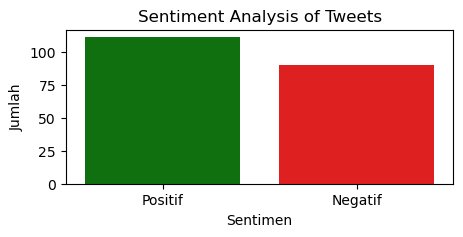

In [38]:
plt.figure(figsize=(5, 2))
sns.countplot(x='sentiment', data=df,order=['Positif', 'Negatif'], palette={'Positif': 'green', 'Negatif': 'red'})
plt.title('Sentiment Analysis of Tweets')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.show()

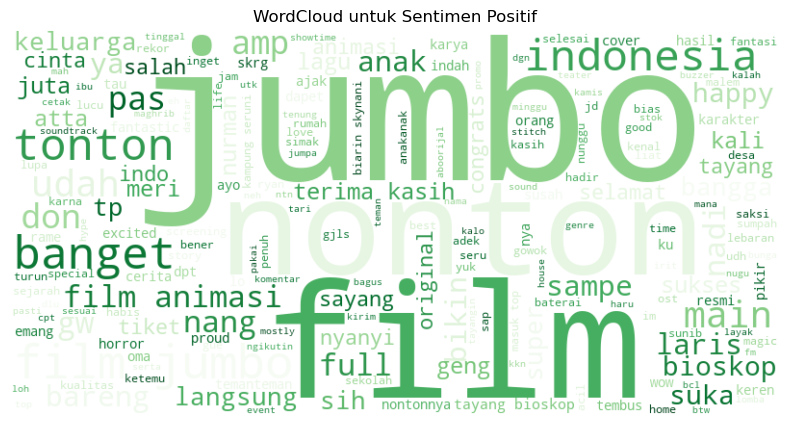

In [39]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

positif_df = df[df['sentiment'] == 'Positif']

text_positif = ' '.join(positif_df['stemmed_text'].dropna())

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate(text_positif)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud untuk Sentimen Positif')
plt.show()

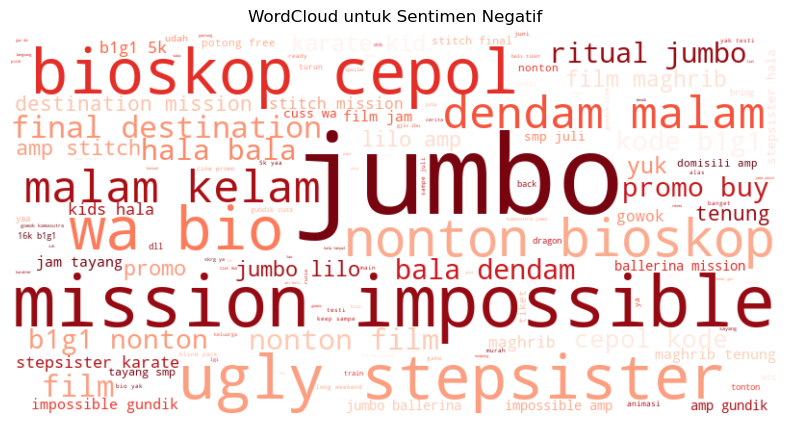

In [40]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

positif_df = df[df['sentiment'] == 'Negatif']

text_positif = ' '.join(positif_df['stemmed_text'].dropna())

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(text_positif)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud untuk Sentimen Negatif')
plt.show()

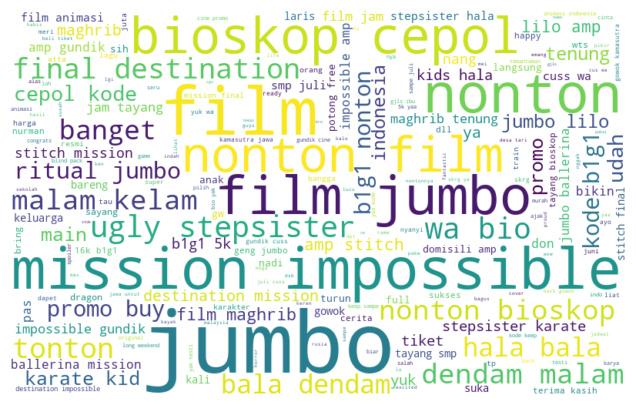

In [41]:
from wordcloud import WordCloud
all_words = ' '.join([str(text) for text in df['stemmed_text']])
wordcloud = WordCloud(width=800, height=500, background_color='white', random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [42]:
df.shape

(201, 6)

# Machine Learning

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, confusion_matrix

x = df['stemmed_text']
y = df['sentiment']


In [44]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Vektorisasi

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import pandas as pd

tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(df['cleaned_text'])

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df['sentiment'])

tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())
tfidf_df['sentiment'] = df['sentiment'].values

tfidf_df.head()

07  070625        10  100  1010  10171372  1017juta  1020  10jt   11  \
0  0.0     0.0  0.000000  0.0   0.0       0.0       0.0   0.0   0.0  0.0   
1  0.0     0.0  0.000000  0.0   0.0       0.0       0.0   0.0   0.0  0.0   
2  0.0     0.0  0.000000  0.0   0.0       0.0       0.0   0.0   0.0  0.0   
3  0.0     0.0  0.142094  0.0   0.0       0.0       0.0   0.0   0.0  0.0   
4  0.0     0.0  0.000000  0.0   0.0       0.0       0.0   0.0   0.0  0.0   

   1230  126   13  1300  1420  1430  1435  1505  1620  1630  16k   17  1700  \
0   0.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.0  0.0   0.0   
1   0.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.0  0.0   0.0   
2   0.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.0  0.0   0.0   
3   0.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.0  0.0   0.0   
4   0.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.0  0.0   0.0   

   17k  17ktiket  1800  1835  1850  18k  19k  200  2000  2019      2025  2030  \
0  0.0       0.0   0.0   0.0   0.0  0.0  0.0  0.0   0.0   0.0  0.136114   0.0   
1  0.0       0.0   0.0   0.0   0.0  0.0  0.0  0.0   0.0   0.0  0.000000   0.0   
2  0.0       0.0   0.0   0.0   0.0  0.0  0.0  0.0   0.0   0.0  0.000000   0.0   
3  0.0       0.0   0.0   0.0   0.0  0.0  0.0  0.0   0.0   0.0  0.000000   0.0   
4  0.0       0.0   0.0   0.0   0.0  0.0  0.0  0.0   0.0   0.0  0.000000   0.0   

        20k   21  212   22   24   25  25k  25ktix   2d  30000  30an  30k   31  \
0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0    0.0   0.0  0.0  0.0   
1  0.208167  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0    0.0   0.0  0.0  0.0   
2  0.000000  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0    0.0   0.0  0.0  0.0   
3  0.000000  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0    0.0   0.0  0.0  0.0   
4  0.000000  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0    0.0   0.0  0.0  0.0   

    32   3ktiket  4392838   47  4jt  50k  540  54jt   57  5jam  5jt   5k  \
0  0.0  0.000000      0.0  0.0  0.0  0.0  0.0   0.0  0.0   0.0  0.0  0.0   
1  0.0  0.208167      0.0  0.0  0.0  0.0  0.0   0.0  0.0   0.0  0.0  0.0   
2  0.0  0.000000      0.0  0.0  0.0  0.0  0.0   0.0  0.0   0.0  0.0  0.0   
3  0.0  0.000000      0.0  0.0  0.0  0.0  0.0   0.0  0.0   0.0  0.0  0.0   
4  0.0  0.000000      0.0  0.0  0.0  0.0  0.0   0.0  0.0   0.0  0.0  0.0   

        60  60k   66  7300   7m  8000000  895   90   95  aamiin  abis  abisss  \
0  0.00000  0.0  0.0   0.0  0.0      0.0  0.0  0.0  0.0     0.0   0.0     0.0   
1  0.00000  0.0  0.0   0.0  0.0      0.0  0.0  0.0  0.0     0.0   0.0     0.0   
2  0.00000  0.0  0.0   0.0  0.0      0.0  0.0  0.0  0.0     0.0   0.0     0.0   
3  0.00000  0.0  0.0   0.0  0.0      0.0  0.0  0.0  0.0     0.0   0.0     0.0   
4  0.19817  0.0  0.0   0.0  0.0      0.0  0.0  0.0  0.0     0.0   0.0     0.0   

   aboorijal  about  absen  acil  action  actual  ada  adakah    adalah  \
0   0.350405    0.0    0.0   0.0     0.0     0.0  0.0     0.0  0.293225   
1   0.000000    0.0    0.0   0.0     0.0     0.0  0.0     0.0  0.000000   
2   0.000000    0.0    0.0   0.0     0.0     0.0  0.0     0.0  0.000000   
3   0.000000    0.0    0.0   0.0     0.0     0.0  0.0     0.0  0.162410   
4   0.000000    0.0    0.0   0.0     0.0     0.0  0.0     0.0  0.000000   

   adegan  adek  adik  adriandhy  aduk  adventure  after  agak      agar  \
0     0.0   0.0   0.0        0.0   0.0        0.0    0.0   0.0  0.175202   
1     0.0   0.0   0.0        0.0   0.0        0.0    0.0   0.0  0.000000   
2     0.0   0.0   0.0        0.0   0.0        0.0    0.0   0.0  0.000000   
3     0.0   0.0   0.0        0.0   0.0        0.0    0.0   0.0  0.000000   
4     0.0   0.0   0.0        0.0   0.0        0.0    0.0   0.0  0.000000   

   agie   ah  air  ajaa  ajaaa  ajaib  ajak  aje   ak      akan  akhir  \
0   0.0  0.0  0.0   0.0    0.0    0.0   0.0  0.0  0.0  0.000000    0.0   
1   0.0  0.0  0.0   0.0    0.0    0.0   0.0  0.0  0.0  0.000000    0.0   
2   0.0  0.0  0.0   0.0 

# Implementasi SMOTE

In [47]:
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(X_tfidf, y_encoded)
x_train, x_test, y_train, y_test = train_test_split(x_train_resampled, y_train_resampled, test_size=0.25, random_state=42)

In [48]:
"""
sentiment_counts = y_train_resampled.value_counts()

# Filter for 'Positif' and 'Negatif' sentiments
sentiment_counts = sentiment_counts[sentiment_counts.index.isin(['Positif', 'Negatif'])]


plt.figure(figsize=(5, 2))
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'red'])
plt.xlabel('Sentiment')
plt.ylabel('Jumlah')
plt.title('Jumlah Sentimen Setelah SMOTE (Positif and Negatif)')
plt.xticks(sentiment_counts.index, ['Positif', 'Negatif'])
plt.show()
"""

"\nsentiment_counts = y_train_resampled.value_counts()\n\n# Filter for 'Positif' and 'Negatif' sentiments\nsentiment_counts = sentiment_counts[sentiment_counts.index.isin(['Positif', 'Negatif'])]\n\n\nplt.figure(figsize=(5, 2))\nplt.bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'red'])\nplt.xlabel('Sentiment')\nplt.ylabel('Jumlah')\nplt.title('Jumlah Sentimen Setelah SMOTE (Positif and Negatif)')\nplt.xticks(sentiment_counts.index, ['Positif', 'Negatif'])\nplt.show()\n"

# Penerapan Model Naive Bayes

In [49]:
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(x_train, y_train)

MultinomialNB()

In [50]:
y_pred = naive_bayes_model.predict(x_test)

In [51]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
precision_score = precision_score(y_test, y_pred, average='weighted')
recall_score = recall_score(y_test, y_pred, average='weighted')
f1_score = f1_score(y_test, y_pred, average='weighted')
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision_score}')
print(f'Recall: {recall_score}')
print(f'F1-Score: {f1_score}')
print(f'\nLaporan Klasifikasi:\n{report}')

Accuracy: 0.8571428571428571
Precision: 0.8571428571428571
Recall: 0.8571428571428571
F1-Score: 0.8571428571428571

Laporan Klasifikasi:
              precision    recall  f1-score   support

     Negatif       0.85      0.85      0.85        27
     Positif       0.86      0.86      0.86        29

    accuracy                           0.86        56
   macro avg       0.86      0.86      0.86        56
weighted avg       0.86      0.86      0.86        56



# Uji Test

In [56]:
def clean_text(text):
    import re
    text = re.sub(r"@[A-Za-z0-9_]+", '', text)
    text = re.sub(r"#\w+", '', text)
    text = re.sub(r"RT[\s]+", '', text)
    text = re.sub(r"https?://\S+", '', text)
    text = re.sub(r"[^A-Za-z0-9\s]", '', text)

    text = re.sub(r'\bpls\b', 'tolong', text)
    text = re.sub(r'\bthx\b', 'terima kasih', text)
    text = re.sub(r'\bbur\b', 'kamu', text)
    text = re.sub(r'\bbu\b', 'kamu', text)
    text = re.sub(r'\bbim\b', 'saya', text)
    text = re.sub(r'\bga\b', 'tidak', text)
    text = re.sub(r'\byg\b', 'yang', text)
    text = re.sub(r'\bdg\b', 'dengan', text)
    text = re.sub(r'\btdk\b', 'tidak', text)
    text = re.sub(r'\baja\b', 'saja', text)
    text = re.sub(r'\bgak\b', 'tidak', text)
    text = re.sub(r'\bdlm\b', 'dalam', text)
    text = re.sub(r'\bkl\b', 'kalau', text)
    text = re.sub(r'\bkbrn\b', 'karena', text)
    text = re.sub(r'\bdri\b', 'dari', text)
    text = re.sub(r'\bngg\b', 'ingin', text)
    text = re.sub(r'\bdk\b', 'tidak', text)
    text = re.sub(r'\bsbg\b', 'sebagai', text)
    text = re.sub(r'\bbmlm\b', 'belum', text)
    text = re.sub(r'\bsdh\b', 'sudah', text)
    text = re.sub(r'\baj\b', 'saja', text)
    text = re.sub(r'\bknp\b', 'kenapa', text)
    text = re.sub(r'\bnih\b', 'ini', text)
    text = re.sub(r'\bdeh\b', 'sudah', text)
    text = re.sub(r'\bbok\b', 'baik', text)
    text = re.sub(r'\bken\b', 'kenapa', text)
    text = re.sub(r'\blg\b', 'lagi', text)
    text = re.sub(r'\bsmg\b', 'semoga', text)

    text = re.sub(r'\s+', ' ', text).strip()
    text = text.lower()
    return text

new_text = input("Masukkan teks untuk analisis sentimen: ")

new_text_cleaned = clean_text(new_text)

new_text_vectorized = tfidf.transform([new_text_cleaned])

new_prediction = naive_bayes_model.predict(new_text_vectorized)

if new_prediction[0] == 'Positif':
    print("Sentimen: Positif")
else:
    print("Sentimen: Negatif")

print("Teks asli:", new_text)
print("Setelah preprocessing:", new_text_cleaned)
print("Hasil prediksi:", new_prediction[0])


Sentimen: Negatif
Teks asli: jelek
Setelah preprocessing: jelek
Hasil prediksi: 0


In [ ]:
import pickle
# Simpan model dan vectorizer
with open('model_nb.pkl', 'wb') as f:
    pickle.dump(naive_bayes_model, f)

with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf, f)
